## CODING ASSIGNMENT-3

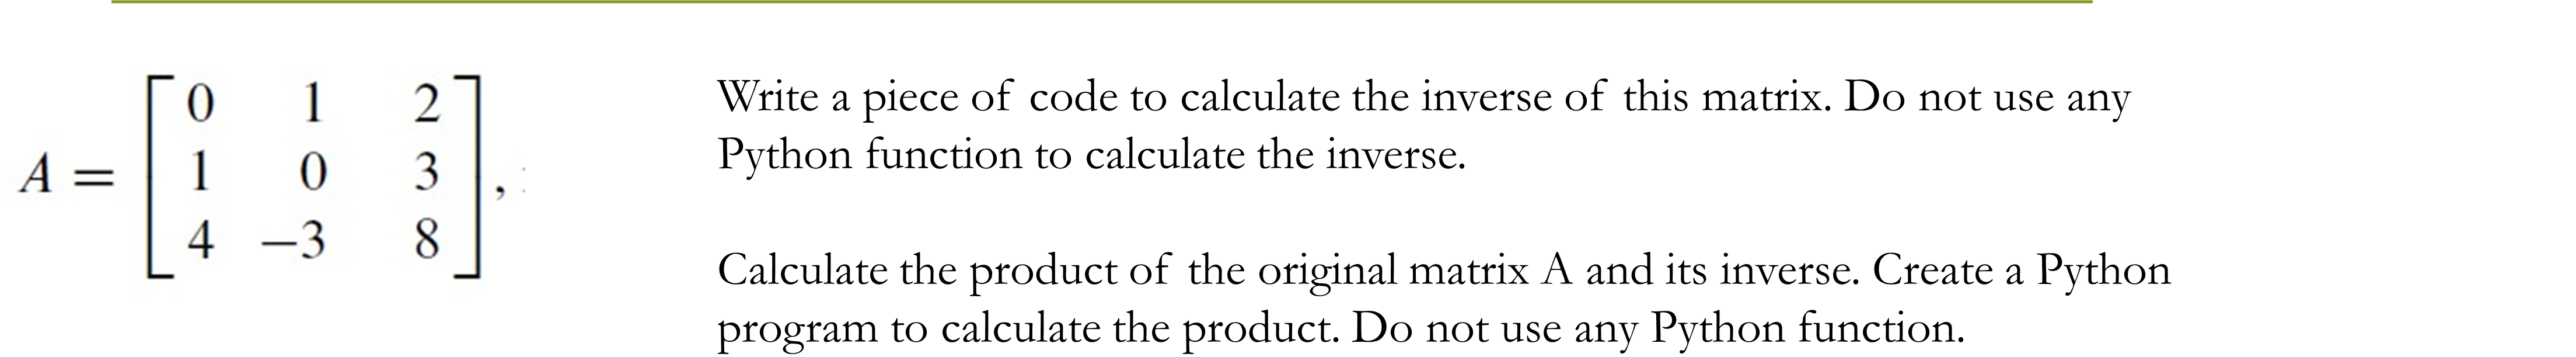

## Inverse of a Matrix:

The inverse of a square matrix A, denoted as A^-1, is a matrix that, when multiplied with A, yields the identity matrix I.
Formally, 
                                            A * A^-1 = A^-1 * A = I.

For an inverse to exist, the matrix A must be `square` and `non-singular`, which means its determinant det(A) must be non-zero (det(A) != 0).





**zero_matrix()** function is used to create a zero matrix.

It returns a zero matrix

In [2]:

def zero_matrix(rows, cols):
    #matrix declaration
    A = []
    
    for i in range(rows):
        #creating the rows
        A.append([])
        for j in range(cols):
            #appending to the last row
            A[-1].append(0.0)
            
    return A

**identity_matrix()** function is used to create an identity matrix with same dimension as that of the matrix passed.

It returns an identity matrix

In [3]:

def identity_matrix(x):
    rows = len(x)
    cols = len(x[0])

    #matrix declaration
    A = []
    
    for i in range(rows):
        #row initialization
        l = []
        for j in range(cols):
            #assigning all the diagonal elements of the matrix as 1 
            if i == j:
                l.append(1.0)
            #the remaining elemensts of the matrix are assigned as 0
            else:
                l.append(0.0) 
        # Append the row to the identity matrix
        A.append(l)  
    
    return A

**copyMatrix()** function is used to duplicate the matrix which will be used for the calculation.
                                                                            
It returns the copied matrix.

In [4]:

def copyMatrix(M):
    row = len(M)
    col = len(M[0])
    
    MC = zero_matrix(row, col)
    
    for i in range(row):
        for j in range(col):
            MC[i][j] = M[i][j]
            
    return MC

**determinant()** function is used to calculate the determinant.

It returns the determinant

In [5]:

def determinant(matrix):
    size = len(matrix)
    
    # Base case: if the matrix is 1x1, return the single element
    if size == 1:
        return matrix[0][0]
    
    # Base case: if the matrix is 2x2, calculate the determinant directly
    if size == 2:
        return matrix[0][0] * matrix[1][1] - matrix[0][1] * matrix[1][0]

    #for matrix of the form nxn where n>2
    det = 0
    # Create a submatrix by excluding the first row and the current column
    for col in range(size):
        submatrix = []
        for i in range(1, size): #first row is excluded here
            subrow = []
            for j in range(size):
                if j != col:     #first current column is excluded here
                    subrow.append(matrix[i][j])
            submatrix.append(subrow)
        
        # Calculating the determinant of the submatrix recursively
        sub_det = determinant(submatrix)
        
        # Adding or subtracting the determinant of the submatrix based on the column index
        if col % 2 == 0:                           #i.e 0 or 2
            det += matrix[0][col] * sub_det
        else:                                      # 1
            det -= matrix[0][col] * sub_det
    
    return det

**inverseMatrix()** is usesd to calculate the inverse of the matrix.

The approach used here is Gauss Jordan Elimination method

In [6]:
def inverseMatrix(x):
    #check if the matrix is a square matrix i.e nxn
    if len(x) == len(x[0]):
        det = determinant(x)
        
        #check whether the matrix is singular matrix 
        """
        if its a singular matrix i.e if the determinant is equal to zero,
        it is not possible to calculate the inverse of the matrix
        """
        if det != 0:
            #create copies of both matrix A and the identity matrix using the function copyMatrix() defined earlier
            A_copy = copyMatrix(x)
            I = identity_matrix(x)
            I_copy = copyMatrix(I)
            
            indices = list(range(len(x)))
            
            for fd in range(len(x)):
                # Handle zero diagonal elements by swapping rows
                """
                if the diagonal of the current row is zero,then swap it with the next row 
                continue until a nonzero element becomes the diagonal of the current row
                """
                ##check whether diagonal of the current row is row
                if A_copy[fd][fd] == 0:
                    for i in range(fd + 1, len(x)):
                        if A_copy[i][fd] != 0:
                            #swap the current row with the row which as a nonzero element 
                            A_copy[fd], A_copy[i] = A_copy[i], A_copy[fd]
                            #whatever rows are swapped in the matrix A should be swapped in the identity matrix
                            I_copy[fd], I_copy[i] = I_copy[i], I_copy[fd]
                            break

                #scaling the diagonal element with its reciprocal to get the pivot as 1
                fdScaler = 1.0 / A_copy[fd][fd]

                #scaling the entire row in both the matrix A and the identity matrix which contains the pivot element
                for j in range(len(x)):
                    A_copy[fd][j] *= fdScaler
                    I_copy[fd][j] *= fdScaler


                """
                This loop performs row operations to eliminate all other elements in the column of the 
                pivot element (except the pivot element itself)
                by using the pivot element as a reference point.
                It reduces the matrix A_copy to its reduced row echelon form (RREF).
                crScaler is a scaling factor calculated based on the elements of the 
                current row (i) and the pivot element's column (fd).
                """
                
                for i in indices[0:fd] + indices[fd+1:]:
                    
                    crScaler = A_copy[i][fd]
                    
                    for j in range(len(x)):
                        A_copy[i][j] = A_copy[i][j] - crScaler * A_copy[fd][j]
                        I_copy[i][j] = I_copy[i][j] - crScaler * I_copy[fd][j]

            #display the given matrix
            print("Your matrix is:")
            for row in x:
                print([round(x, 3) for x in row])    
            print("-----------------------------")

            #display the inverse of the matrix which will be the updated identity matrix 
            print("The inverse of your matrix is:")
            for row in I_copy:
                print([round(x, 3) for x in row])  #round off the result to three decimals

            return I_copy
        else:
            print("The determinant of this matrix is 0. Therefore we cannot find its inverse.")
    else:
        print("This is not a square matrix. Therefore we cannot find its inverse.")


Call the inverseMatrix() by passing the given_matrix to start the execution

In [7]:

given_matrix = [[0, 1, 2], [1, 0, 3], [4, -3, 8]]
inverseMatrix(given_matrix)

Your matrix is:
[0, 1, 2]
[1, 0, 3]
[4, -3, 8]
-----------------------------
The inverse of your matrix is:
[-4.5, 7.0, -1.5]
[-2.0, 4.0, -1.0]
[1.5, -2.0, 0.5]


[[-4.5, 7.0, -1.5], [-2.0, 4.0, -1.0], [1.5, -2.0, 0.5]]

**Verification**

In [8]:
#verification
"""
as part of verify the inverse we got,
the inbuilt function np.linalg.inv() of the numpy library is used
"""
import numpy as np
inverse_matrix = np.linalg.inv(given_matrix)
print("the inverse found using numpy ")
print(inverse_matrix)

the inverse found using numpy 
[[-4.5  7.  -1.5]
 [-2.   4.  -1. ]
 [ 1.5 -2.   0.5]]


**matrix_multipy()** function performs the matrix multiplication of the two given Matrix.

it returns the resultant mcopyMatrix

In [9]:

def matrix_multiply(a, b):
    #check if the column of the first matrix is equal to the row of the second matrix
    if len(a[0]) != len(b):
       print("Number of columns in matrix 'a' must be equal to the number of rows in matrix 'b'.")

    # Initialize an empty result matrix with dimensions rows(a) x cols(b)
    result = []
    for i in range(len(a)):
    # Initialize each row of the result matrix with zeros
        row = []
        for j in range(len(b[0])):
            row.append(0)
        result.append(row)


    # Perform matrix multiplication
    for i in range(len(a)):
        for j in range(len(b[0])):
            for k in range(len(b)):
                result[i][j] += a[i][k] * b[k][j]
    print('\nthe resultant matrix is \n')
    return result


Call the matrix_multipy() function by passing the given matrix and the inverse of that matrix

In [10]:
matrix_multiply(given_matrix,inverseMatrix(given_matrix))

Your matrix is:
[0, 1, 2]
[1, 0, 3]
[4, -3, 8]
-----------------------------
The inverse of your matrix is:
[-4.5, 7.0, -1.5]
[-2.0, 4.0, -1.0]
[1.5, -2.0, 0.5]

the resultant matrix is 



[[1.0, 0.0, 0.0], [0.0, 1.0, 0.0], [0.0, 0.0, 1.0]]

Checking the correctness of the code by trying with other examples

In [11]:
#trying with other examples
A=[[1,2,3],[0,1,4],[5,6,0]]
inverseMatrix(A)

inverse_matrix = np.linalg.inv(A)
print("the inverse found using numpy ")
print(inverse_matrix)

Your matrix is:
[1, 2, 3]
[0, 1, 4]
[5, 6, 0]
-----------------------------
The inverse of your matrix is:
[-24.0, 18.0, 5.0]
[20.0, -15.0, -4.0]
[-5.0, 4.0, 1.0]
the inverse found using numpy 
[[-24.  18.   5.]
 [ 20. -15.  -4.]
 [ -5.   4.   1.]]


In [12]:
matrix_multiply(A,inverseMatrix(A))

Your matrix is:
[1, 2, 3]
[0, 1, 4]
[5, 6, 0]
-----------------------------
The inverse of your matrix is:
[-24.0, 18.0, 5.0]
[20.0, -15.0, -4.0]
[-5.0, 4.0, 1.0]

the resultant matrix is 



[[1.0, 0.0, 0.0], [0.0, 1.0, 0.0], [0.0, 0.0, 1.0]]